In [1]:
import sympy
from phasor.utilities.ipynb.displays import *
from phasor.utilities.ipynb.ipy_sympy import *
import scipy.linalg


import numpy.testing as np_test
import declarative as decl
from declarative.bunch import (
    DeepBunch,
)

#import numpy as np

from phasor import system
from phasor import readouts
from phasor import optics
from phasor.utilities.print import pprint

from phasor.optics.models import AOMTestStand

Populating the interactive namespace from numpy and matplotlib
Sympy version:  1.0


In [2]:
db = DeepBunch()
db.test.LO.phase.val = 0
db.test.LO.phase.units = 'deg'
db.test.aom.N_ode = 100
db.test.aom.solution_order = 0
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = AOMTestStand.AOMTestStand()
db = sys.ctree_shadow()
sys.test.LO.amplitude
print(sys.test.DC_R1.DC_readout)
print(sys.test.DC_R2.DC_readout)
print(sys.test.DC_R1.DC_readout + sys.test.DC_R2.DC_readout)

Number of states:  10
6.143540920213429e-05
1.00006168857196
1.00012312398


In [3]:
db = DeepBunch()
db.test.LO.phase.val = 0
db.test.LO.phase.units = 'deg'
db.test.LO.amplitude = np.linspace(0, 1, 100)
db.test.aom.N_ode = 100
db.test.aom.solution_order = 0
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = AOMTestStand.AOMTestStand()
db = sys.ctree_shadow()
#sys.test.LO.amplitude


Number of states:  10


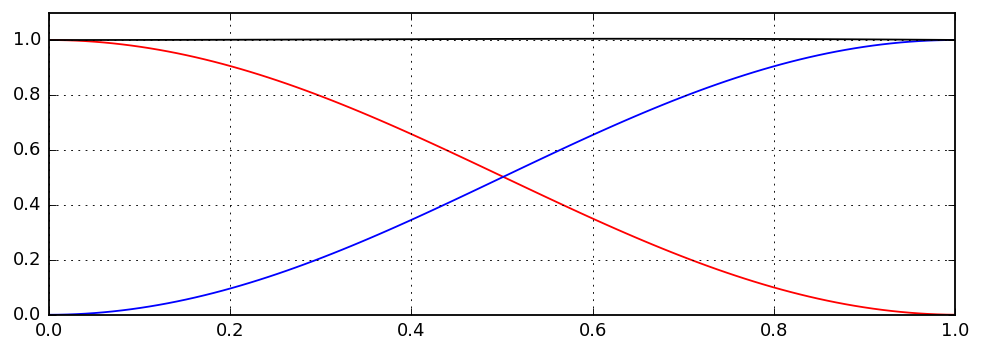

In [4]:
axB = mplfigB(Nrows=1)
test = sys.test
axB.ax0.plot(test.LO.amplitude, test.DC_R1.DC_readout, color = 'red')
axB.ax0.plot(test.LO.amplitude, test.DC_R2.DC_readout, color = 'blue')
axB.ax0.plot(test.LO.amplitude, test.DC_R1.DC_readout + test.DC_R2.DC_readout, color = 'black')
axB.ax0.set_ylim(0, 1.1)

In [15]:
db = DeepBunch()
db.test.aoms.AOM1.N_ode = 100
db.test.aoms.VCO_AOM1.generate.amplitude = np.linspace(.01, 1.5, 100)
db.test.aoms.VCO_AOM2.generate.amplitude = .01
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = AOMTestStand.AOM2VCOTestStand(
    VCO2_use = True,
)
db = sys.ctree_shadow()
#sys.test.LO.amplitude


Number of states:  50


/usr/lib64/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


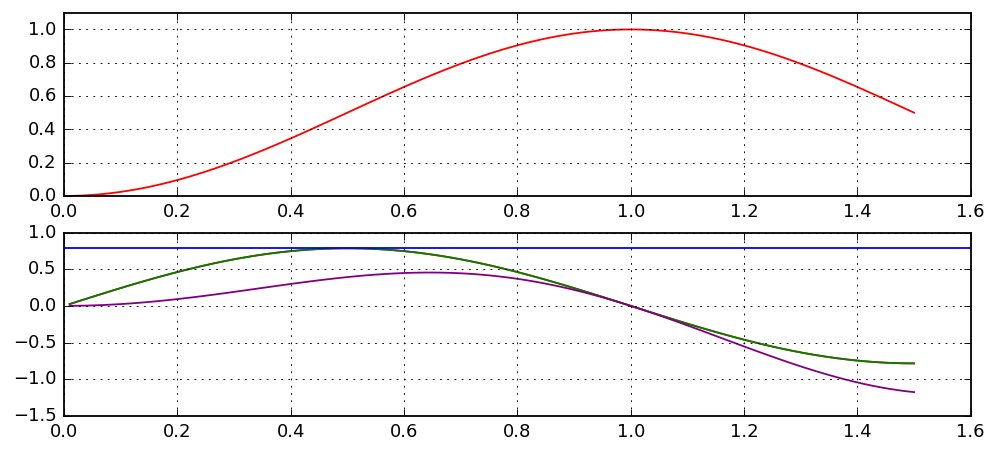

In [16]:
axB = mplfigB(Nrows=2)
test = sys.test
X = sys.test.aoms.VCO_AOM1.generate.amplitude
Y = sys.test.aoms.VCO_AOM2.generate.amplitude
axB.ax0.plot(X, test.DC_R.DC_readout, color = 'red')
axB.ax1.plot(X, test.DC_RR.DC_readout / X / Y**2, color = 'red')
axB.ax1.plot(X, test.AC_R.AC_sensitivity / X, color = 'green')
axB.ax1.plot(X, test.AC_R.AC_sensitivity, color = 'purple')
#axB.ax0.plot(X, test.DC_R2.DC_readout, color = 'blue')
#axB.ax0.plot(X, test.DC_R1.DC_readout + test.DC_R2.DC_readout, color = 'black')
axB.ax0.set_ylim(0, 1.1)
axB.ax1.axhline(np.pi/4)

/usr/lib64/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


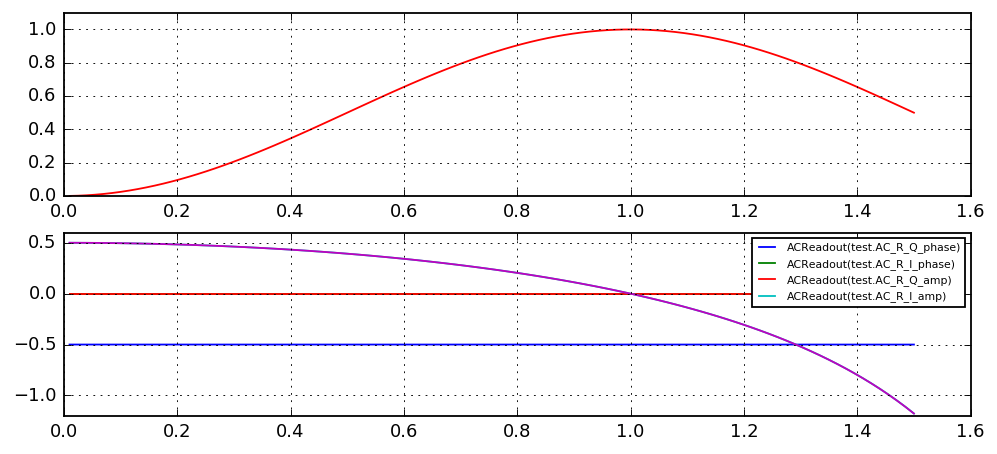

In [25]:
axB = mplfigB(Nrows=2)
test = sys.test
X = sys.test.aoms.VCO_AOM1.generate.amplitude
Y = sys.test.aoms.VCO_AOM2.generate.amplitude
axB.ax0.plot(X, test.DC_R.DC_readout, color = 'red')
def plot_sensitivity(ax, X, obj):
    axB.ax1.plot(X, obj.AC_sensitivity, label = str(obj))
plot_sensitivity(axB.ax1, X, test.AC_R_Q_phase)
plot_sensitivity(axB.ax1, X, test.AC_R_I_phase)
plot_sensitivity(axB.ax1, X, test.AC_R_Q_amp)
plot_sensitivity(axB.ax1, X, test.AC_R_I_amp)
axB.ax1.plot(X, np.pi/2 * X*sin(X * np.pi) / sin(X * np.pi/2)**2 / 4)
axB.ax1.legend(fontsize = 6)
#axB.ax0.plot(X, test.DC_R2.DC_readout, color = 'blue')
#axB.ax0.plot(X, test.DC_R1.DC_readout + test.DC_R2.DC_readout, color = 'black')
axB.ax0.set_ylim(0, 1.1)
#axB.ax1.axhline(np.pi/4)